In [15]:
from __future__ import division, print_function
%matplotlib inline

# Morphological operations

Morphology is the study of shapes. In image processing, some simple operations can get you a long way. In this lab, we discuss the following morphological operations:
- Erosion, Dilation
- Opening, Closing

In [16]:
import numpy as np
from matplotlib import pyplot as plt, cm
import skdemo
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
from skimage import morphology

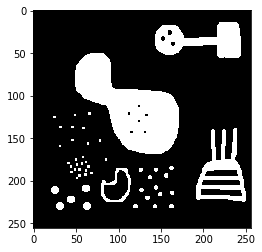

In [17]:
# image = np.array([[0, 0, 0, 0, 0, 0, 0],
#                   [0, 0, 0, 0, 0, 0, 0],
#                   [0, 0, 1, 1, 1, 0, 0],
#                   [0, 0, 1, 1, 1, 0, 0],
#                   [0, 0, 1, 1, 1, 0, 0],
#                   [0, 0, 0, 0, 0, 0, 0],
#                   [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

from skimage import io
image = io.imread('../images/bwshapes.png')

plt.imshow(image);

The documentation for scikit-image's morphology module is
[here](http://scikit-image.org/docs/0.10.x/api/skimage.morphology.html).

## Structuring element
Importantly, we must use a *structuring element*, which defines the local
neighborhood of each pixel. To get every neighbor (up, down, left, right, and
diagonals), use `morphology.square`; to avoid diagonals, use
`morphology.diamond`:

sq= [[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
dia= [[0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]]


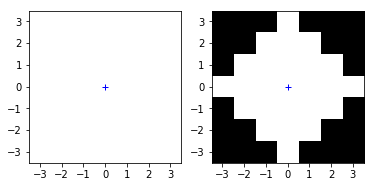

In [18]:
from skimage import morphology
sq = morphology.square(width=7)
dia = morphology.diamond(radius=3)
print("sq=",sq)
print("dia=",dia)

def show_strel(axes,im):
    h=im.shape[0]; w=im.shape[1];
    h2=h/2; w2=w/2;
    axes.imshow(im, vmin=0, vmax=1, extent=(-w2,w2,-h2,h2))
    axes.plot(0,0,'+b', scalex=False, scaley=False)
    axes.set_xticks(np.arange(w)-w2+0.5)
    axes.set_yticks(np.arange(h)-h2+0.5)

fig, axes = plt.subplots(1,2)
show_strel(axes[0],sq)
show_strel(axes[1],dia)

The center of the structuring element represents the pixel being considered, and the surrounding values are the neighbors: a 1 value means that pixel counts as a neighbor, while a 0 value does not. Note that most structuring elements have odd width and height (3, 5, 7...) in order to be symetrical with respect to the central pixel.

## Erosion and Dilation

The first things to learn are *erosion* and *dilation*. In erosion, we look at a pixel’s local neighborhood and replace the value of that pixel with the minimum value of that neighborhood. In dilation, we instead choose the maximum.

Erosion by the square structuring element produces:

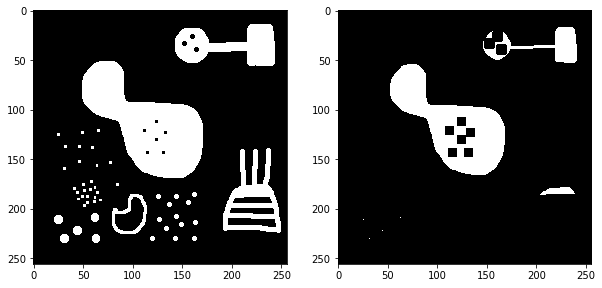

In [19]:
sq_erode = morphology.erosion(image, sq)
skdemo.imshow_all(image, sq_erode, shape=(1, 2))

**Discussion:** What are the effects of the erosion 
on the various elements of the image ?

- ...
- ...

Dilation by the square produces:

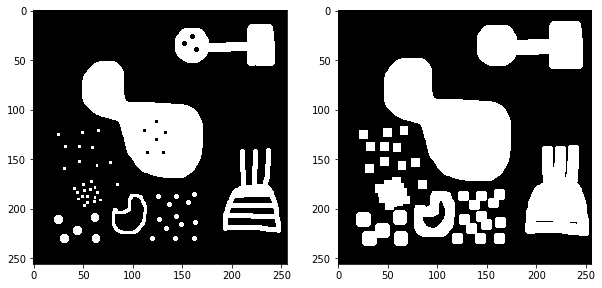

In [20]:
sq_dilate = morphology.dilation(image, sq)
skdemo.imshow_all(image, sq_dilate)

**Discussion:** What are the effects of the dilation on the various elements of the image ?
- ...
- ...

If we dilate by a diamond structurating element, we obtain instead:

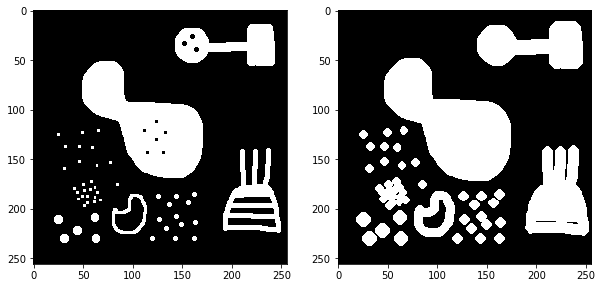

In [21]:
skdemo.imshow_all(image, morphology.dilation(image, dia))

**Discussion:** what are the differences between dilation by a square and dilation by a diamond?
- ...
- ...

## Opening and Closing
Erosion and dilation can be combined into two slightly more sophisticated operations, *opening* and *closing*. Here's an example:

What happens when run an erosion followed by a dilation of this image?

What about the reverse?

Try to imagine the operations in your head before trying them out below.

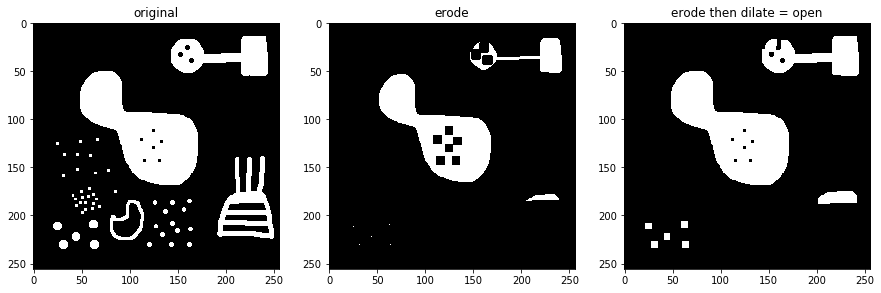

In [22]:
sq_open = morphology.opening(image, sq)
skdemo.imshow_all(image, sq_erode, sq_open, titles=['original','erode','erode then dilate = open']) # erosion -> dilation

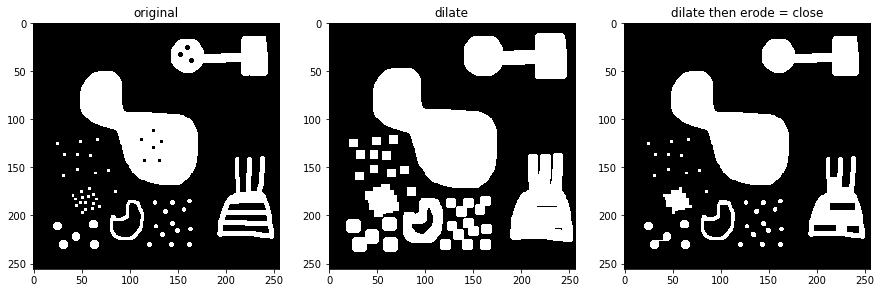

In [23]:
sq_close = morphology.closing(image, sq)
skdemo.imshow_all(image, sq_dilate, sq_close, titles=['original','dilate','dilate then erode = close']) # dilation -> erosion

## Alternated filters

To regularize imperfections in both black and white, both opening and closing can be used in alternation

Text(0.5,1,'Open then Close')

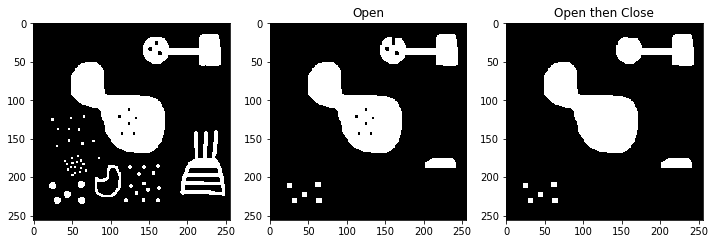

In [24]:
sq_open_close = morphology.closing(sq_open, sq)

fig, axes = plt.subplots(1,3, figsize=(12,6))
axes[0].imshow(image)
axes[1].imshow(sq_open); axes[1].set_title('Open')
axes[2].imshow(sq_open_close); axes[2].set_title('Open then Close')

To summarize visually all operations, we can show the differences:

Text(0.5,1,'Open and Close')

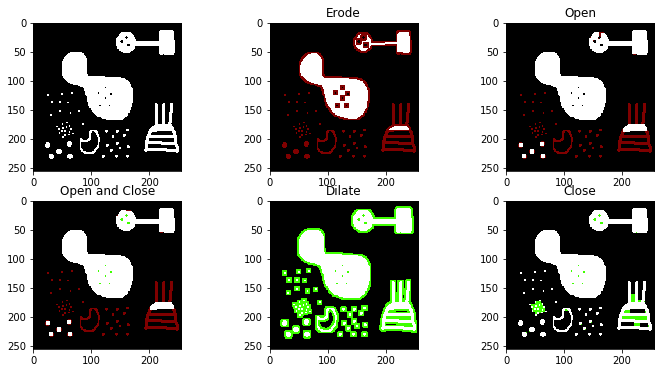

In [25]:
from skimage import img_as_float
from matplotlib.colors import LinearSegmentedColormap
def show_diff(im1, im2, axes=None):
    if (axes is None):
        axes = plt
    fim1=img_as_float(im1)
    fim2=img_as_float(im2)
    diffcm=LinearSegmentedColormap.from_list('diffcm', [[0,0,0],[0.25,1.0,0],[0.5,0,0],[1,1,1]], N=4)
    axes.imshow(0.5*fim1+0.25*fim2,cmap=diffcm,vmin=0,vmax=1)

fig, axes = plt.subplots(2,3, figsize=(12,6))
axes[0,0].imshow(image)
show_diff(image, sq_erode, axes=axes[0,1]); axes[0,1].set_title('Erode')
show_diff(image, sq_open, axes=axes[0,2]); axes[0,2].set_title('Open')
show_diff(image, sq_dilate, axes=axes[1,1]); axes[1,1].set_title('Dilate')
show_diff(image, sq_close, axes=axes[1,2]); axes[1,2].set_title('Close')
show_diff(image, sq_open_close, axes=axes[1,0]); axes[1,0].set_title('Open and Close')

**Exercise**: use morphological operations to clean a segmentation

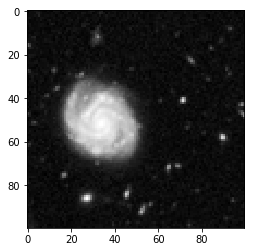

In [26]:
from skimage import data, color
hub = color.rgb2gray(data.hubble_deep_field()[350:450, 90:190])
plt.imshow(hub);

Remove the smaller objects to retrieve the large galaxy.

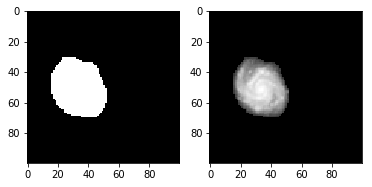

In [27]:
J=morphology.opening(hub,sq)
J=morphology.closing(J,sq)

plt.subplot(121)
plt.imshow(J>0.2)
plt.subplot(122)
plt.imshow((J>0.2).astype('float')*hub)